# EDA of Weather and Coffee Data


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

# import weather data
weather = pd.read_csv("../data/weather/weather_data.csv")

In [3]:
# TODO: Merge these two dataframes together

merged_df = pd.merge(weather, coffee, on=["year", "subdivision"])


In [4]:
# TODO: View the first 5 rows of data

merged_df.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision,country,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Arabica,16.30,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais,Brazil,Arabica,23.70,563.0,5730.0,186.0,2245.0,2552.0,3030.0
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais,Brazil,Arabica,16.85,679.0,5720.0,196.0,2235.0,2559.0,3468.0
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais,Brazil,Arabica,25.55,663.0,5770.0,188.0,2223.0,2596.0,3527.0
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais,Brazil,Arabica,22.10,873.0,5725.0,244.0,2151.0,2662.0,3578.0


In [5]:
# TODO: Check for null values 

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          18 non-null     int64  
 1   rain_max                      18 non-null     float64
 2   temp_avg                      18 non-null     float64
 3   temp_max                      18 non-null     float64
 4   temp_min                      18 non-null     float64
 5   hum_max                       18 non-null     float64
 6   hum_min                       18 non-null     float64
 7   wind_max                      18 non-null     float64
 8   wind_avg                      18 non-null     float64
 9   subdivision                   18 non-null     object 
 10  country                       18 non-null     object 
 11  type                          18 non-null     object 
 12  60kgs_bag                     18 non-null     float64
 13  nonbear

In [6]:
# TODO: Drop rows that contain null values

merged_df.dropna(inplace=True)
merged_df.shape

(17, 19)

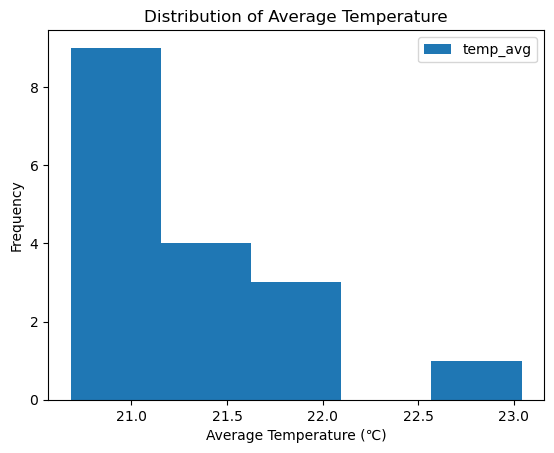

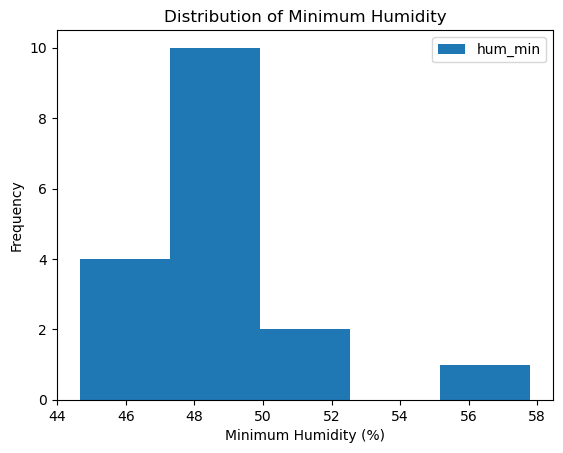

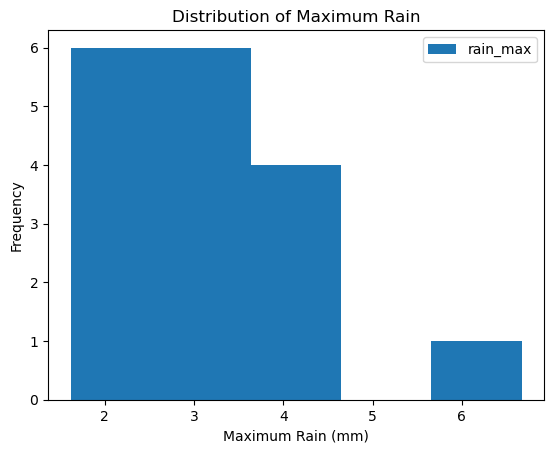

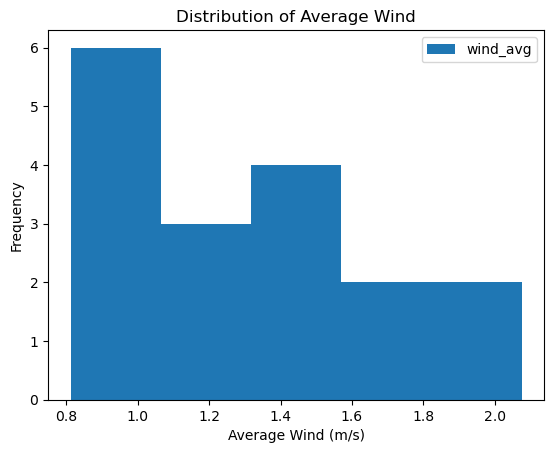

In [12]:
# TODO: BEGIN EDA! 5 questions
weather_data = ["temp_avg", "hum_min", "rain_max", "wind_avg"]
weather_labels = ["Average Temperature", "Minimum Humidity", "Maximum Rain", "Average Wind"]
weather_units = [" (℃)", " (%)", " (mm)", " (m/s)"]

for data, label, units in zip(weather_data, weather_labels, weather_units):
    merged_df.plot(kind="hist", y=data, bins=5)
    plt.xlabel(f"{label}{units}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {label}")
    plt.show()

## Analysis

**QUESTION 1:** Perform bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and the coffee-related column of **60kgs_bag**. What are the directions and strengths of the relationships?

| Compared to | Pearson Coefficient | Interpretation |
|:------------|:--------------------|:---------------|
| temp_avg | -0.12 | Weakly Negative |
| hum_min | -0.54 | Moderately Negative |
| rain_max | -0.40 | Moderately Negative |
| wind_avg | -0.71 | Strongly Negative |

Each scatter plot has a negative relationship. Average wind vs 60kgs bags has the best trendline; all others lack data points throughout trendline. However, Pearson coefficients ideally have normally distributed variables. Mimimum humidity has the best distribution although it is skewed-right; all others are more apparently skewed-right. 60kgs bags itself is roughly normal.

{'temp_avg': -0.12477217306378185, 'hum_min': -0.5401709088326814, 'rain_max': -0.3958109913734919, 'wind_avg': -0.7073271023009808}


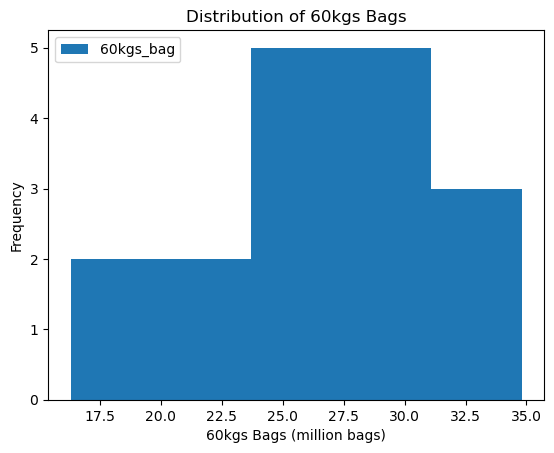

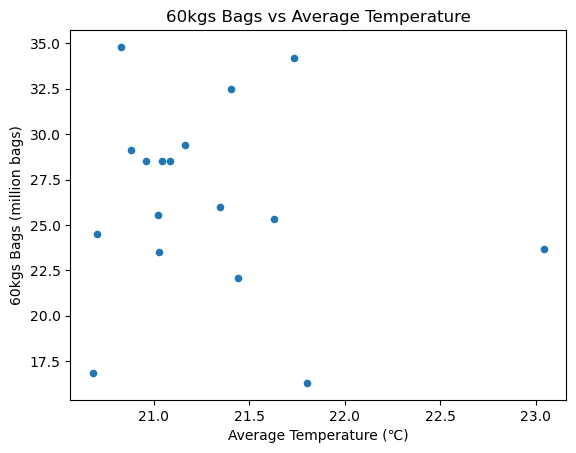

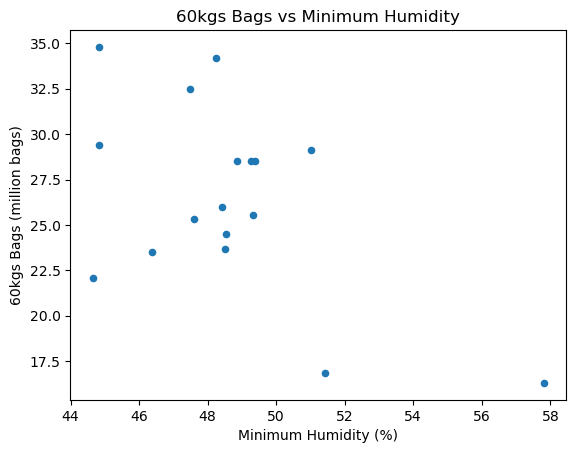

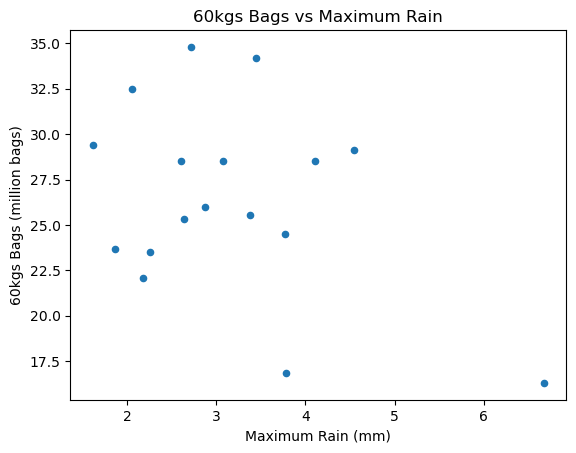

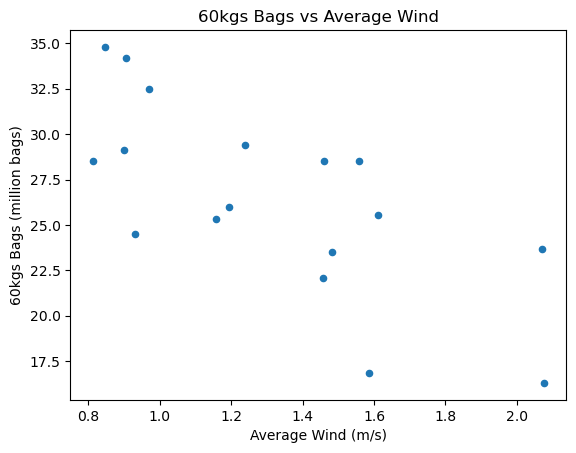

In [14]:
output_corr = {}
for col in weather_data:
    output_corr[col] = float(merged_df["60kgs_bag"].corr(merged_df[col]))
print(output_corr)

merged_df.plot(kind="hist", y="60kgs_bag", bins=5)
plt.xlabel("60kgs Bags (million bags)")
plt.ylabel("Frequency")
plt.title("Distribution of 60kgs Bags")
plt.show()

for data, label, units in zip(weather_data, weather_labels, weather_units):
    merged_df.plot(kind="scatter", x=data, y="60kgs_bag")
    plt.xlabel(f"{label}{units}")
    plt.ylabel("60kgs Bags (million bags)")
    plt.title(f"60kgs Bags vs {label}")
    plt.show()

**QUESTION 2:** Perform bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and the coffee-related column of **bearing_trees_per_hectare**. What are the directions and strengths of the relationships?

| Compared to | Pearson Coefficient | Interpretation |
|:------------|:--------------------|:---------------|
| temp_avg | -0.43 | Moderately Negative |
| hum_min | -0.55 | Moderately Negative |
| rain_max | -0.25 | Weakly Negative |
| wind_avg | -0.89 | Strongly Negative |

Each scatter plot has a negative relationship. Average wind vs bearing threes per hectare has the best trendline; all others lack data points throughout trendline. The same problems as mentioned before exist for the weather factor distributions. Bearing trees per hectare itself is skewed-left.

{'temp_avg': -0.43207570398850825, 'hum_min': -0.5512035768352691, 'rain_max': -0.25352398713240387, 'wind_avg': -0.8939870098310204}


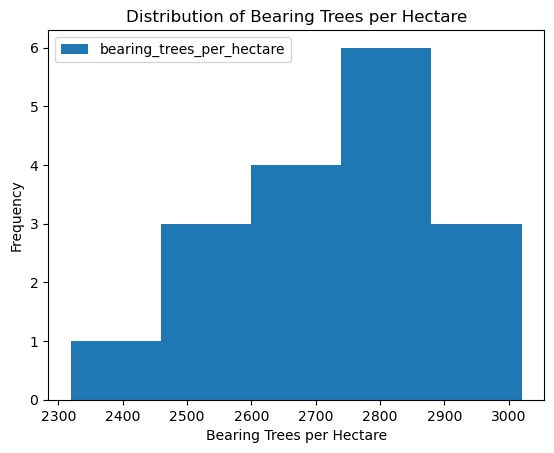

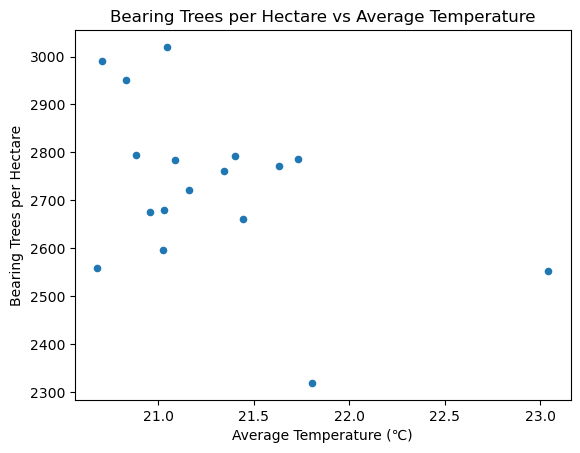

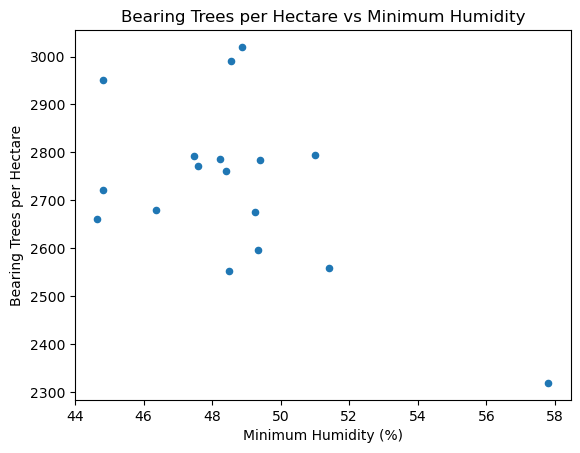

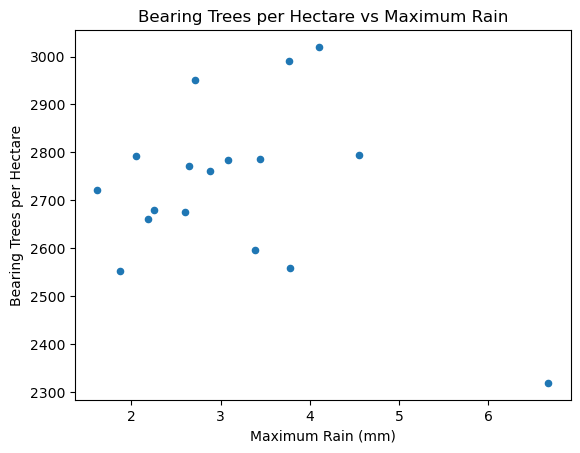

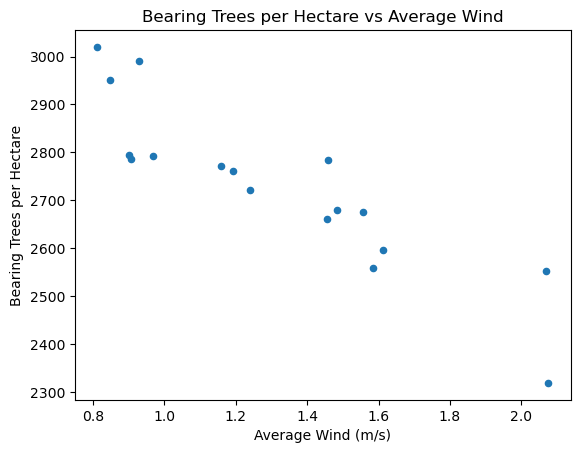

In [15]:
hectare_corr = {}
for col in weather_data:
    hectare_corr[col] = float(merged_df["bearing_trees_per_hectare"].corr(merged_df[col]))
print(hectare_corr)

merged_df.plot(kind="hist", y="bearing_trees_per_hectare", bins=5)
plt.xlabel("Bearing Trees per Hectare")
plt.ylabel("Frequency")
plt.title("Distribution of Bearing Trees per Hectare")
plt.show()

for data, label, units in zip(weather_data, weather_labels, weather_units):
    merged_df.plot(kind="scatter", x=data, y="bearing_trees_per_hectare")
    plt.xlabel(f"{label}{units}")
    plt.ylabel("Bearing Trees per Hectare")
    plt.title(f"Bearing Trees per Hectare vs {label}")
    plt.show()

**QUESTION 3:** Which weather **factor** seems to influence coffee production the **most**? 

> Wind. This factor had both strongly negative coefficients of -0.71 vs 60kgs_bag and -0.89 vs bearing_trees_per_hectare. This factor also had the best trendline against both coffee production factors.

**QUESTION 4:** Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

> Weather data should include all months. Leaf rust data should also be collected in a new dataset. This would allow for comparisons between weather, fungus, and coffee output across the same time periods.

**QUESTION 5:** If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

> Coffee output will be best with low average wind and high temperature. Wind had the strongest negative correlations (-0.70 and -0.89), and temperature had the strongest positive correlations (0.67 and 0.67) against 60kgs_bag and bearing trees per hectare, respectively.

In [39]:
weather_factors = weather.drop(columns=["year", "subdivision"]).columns.values
coffee_corrs = {}
for factor in weather_factors:
    coffee_corrs[factor] = (
        float(merged_df["60kgs_bag"].corr(merged_df[factor])),
        float(merged_df["bearing_trees_per_hectare"].corr(merged_df[factor]))
    )
coffee_corrs

{'rain_max': (-0.3958109913734919, -0.25352398713240387),
 'temp_avg': (-0.12477217306378185, -0.43207570398850825),
 'temp_max': (0.6663839852977869, 0.6714985364681721),
 'temp_min': (-0.4650889503832358, -0.7154019953502896),
 'hum_max': (0.267552593500615, 0.42470680051902276),
 'hum_min': (-0.5401709088326814, -0.5512035768352691),
 'wind_max': (-0.7416515185735786, -0.8282794000332416),
 'wind_avg': (-0.7073271023009808, -0.8939870098310204)}